<a href="https://colab.research.google.com/github/dolly1712/bike-sharing-demand-pred-project/blob/main/bike_sharing_demand_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Rental bikes have become a popular addition to urban cities, making it easier for people to get around conveniently. Ensuring that rental bikes are readily available to the public when needed is crucial for reducing wait times and enhancing mobility. A key challenge lies in predicting the demand for bikes at different times throughout the day to maintain a consistent and stable supply.

To address this challenge, we analyze various factors, including weather conditions such as temperature, humidity, wind speed, visibility, dew point, solar radiation, snowfall, and rainfall. Additionally, we consider the number of bikes rented per hour and date information.

**Attribute Information**



* Date : year-month-day

*   Rented Bike count - Count of bikes rented at each hour

*   Hour - Hour of he day

*   Temperature-Temperature in Celsius

*   Humidity - Humidity Measure

*   Windspeed - windspeed Measure

*   Visibility - Visibility Measure

*   Dew point temperature(Celsius) - Dew point temperature Measure


*   Solar radiation(MJ/m2) - Solar radiation Measure


*   Rainfall(mm) - Rainfall Measure


*   Snowfall(cm) - Snowfall Measure

*   Seasons - Winter, Spring, Summer, Autumn


*   Holiday - Holiday/No holiday


*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV



**Load Dataset**

In [ ]:
bike_df = pd.read_csv("/content/SeoulBikeData.csv", encoding= 'latin1')

In [ ]:
df = bike_df.copy()

**Understanding the data**

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

*   The dataset contains 8760 records and 14 features.
*   There are 11 numerical featrures and 3 categorical features.

In [ ]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

**Unique values in dataset**

In [ ]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Duplicate values in dataset**

In [ ]:
df.duplicated().sum()

0

*   There are no duplicate values in the dataset

**Missing values in the dataset**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

*   Dataset has no missing values.

In [ ]:
df = df.rename(columns={'Rented Bike Count':'rented_bike_count',
                        'Temperature(°C)':'temperature',
                        'Humidity(%)':'humidity',
                        'Wind speed (m/s)':'wind_speed',
                        'Visibility (10m)':'visibility',
                        'Dew point temperature(°C)':'dew_point_temp',
                        'Solar Radiation (MJ/m2)':'solar_radiation',
                        'Rainfall(mm)':'rainfall',
                        'Snowfall (cm)':'snowfall',
                        'Functioning Day':'functioning_day',
                        'Seasons':'seasons',
                        'Holiday':'holiday'})


**Changing dtype of Date column**

In [ ]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-a1e88d345525>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


**Creating new columns of Day, Month and Year**

In [ ]:
# Extract day, month, and year into new columns
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['weekday_weekend'] = df['Date'].dt.dayofweek // 5 #0 for weekday, 1 for weekend

In [ ]:
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')
df['weekday_weekend'] = df['weekday_weekend'].astype('category')

**Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

print(num_cols)

      rented_bike_count  Hour  temperature  humidity  wind_speed  visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      dew_point_temp  solar_radiation  

**KDE plot for each numeric column**

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers



In [ ]:
def plot_kde_boxplot(data, column):

    # Create a figure and axis for the plots
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    # Plot KDE with mean and median lines
    sns.kdeplot(data=data[column], ax=axes[0])
    axes[0].axvline(data[column].mean(), color='r', linestyle='--', label='Mean')
    axes[0].axvline(data[column].median(), color='g', linestyle='-', label='Median')
    axes[0].set_title(f"KDE Plot of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Plot box plot
    sns.boxplot(data=data[column], ax=axes[1])
    axes[1].set_title(f"Box Plot of {column}")
    axes[1].set_xlabel(column)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


In [ ]:
df['rented_bike_count'].value_counts().sum()

8760

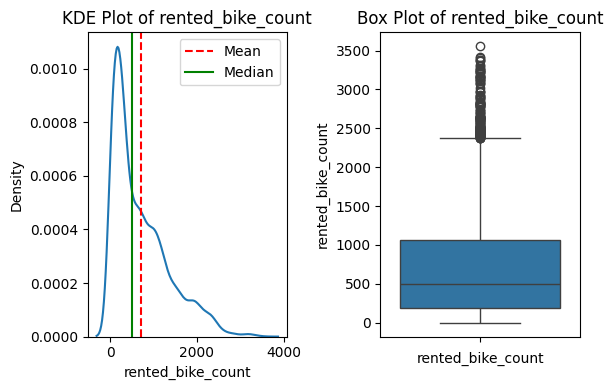

In [ ]:
plot_kde_boxplot(df, 'rented_bike_count')

In [ ]:
outliers = detect_outliers_iqr(df['rented_bike_count'])
print("Outliers:", outliers)


Outliers: 2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: rented_bike_count, Length: 158, dtype: int64





*   Rented bike count is positively skewed.

*   This column has outlier values starting from 2401 to 2632.





**Hour**

In [ ]:
df['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

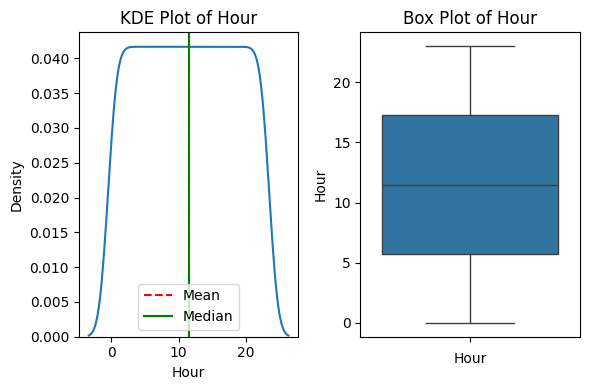

In [ ]:
plot_kde_boxplot(df, 'Hour')



*   Hour column is normally distributed with no outliers.




**Temperature**

In [ ]:
df['temperature'].value_counts()

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: temperature, Length: 546, dtype: int64

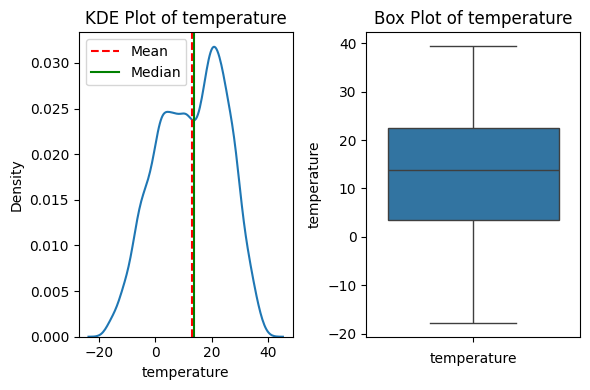

In [ ]:
plot_kde_boxplot(df, 'temperature')



*   Temperature column is normally distributed with no outliers.




**Humidity**

In [ ]:
df['humidity'].value_counts()

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: humidity, Length: 90, dtype: int64

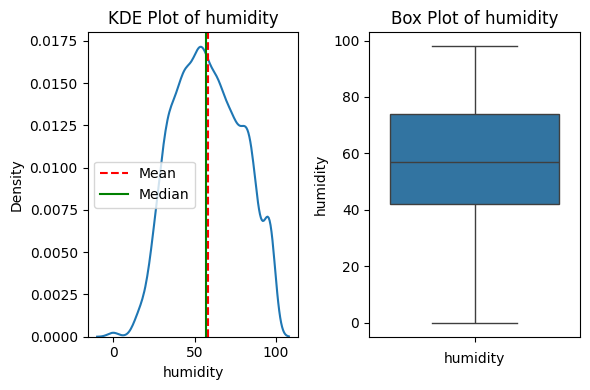

In [ ]:
plot_kde_boxplot(df, 'humidity')

**Wind Speed**

In [ ]:
df['wind_speed'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: wind_speed, Length: 65, dtype: int64

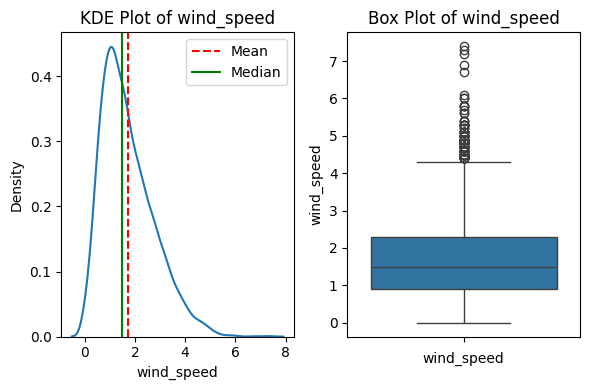

In [ ]:
plot_kde_boxplot(df, 'wind_speed')

In [ ]:
outliers = detect_outliers_iqr(df['wind_speed'])
print("Outliers:", outliers)


Outliers: 82      4.5
84      4.8
85      5.4
86      4.5
87      5.8
       ... 
7934    4.4
7937    5.7
7985    4.9
8242    4.7
8245    5.3
Name: wind_speed, Length: 161, dtype: float64




*   Wind speed is positively skewed.
*   The outlier value starts from 4.5 to 5.3



**Visibility**

In [ ]:
df['visibility'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: visibility, Length: 1789, dtype: int64

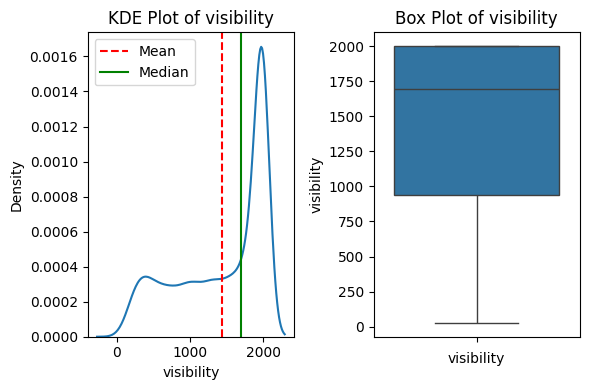

In [ ]:
plot_kde_boxplot(df, 'visibility')



*   Visibility column is negatively skewed.



**Dew point temp**

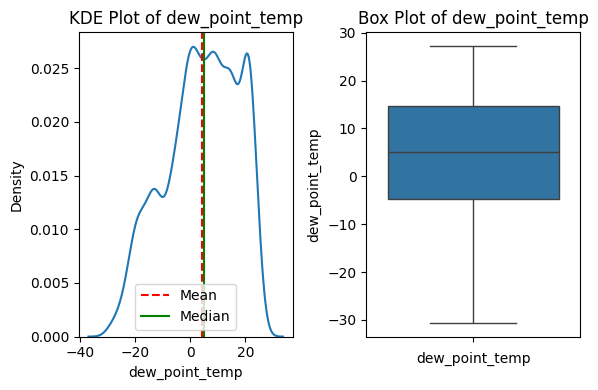

In [ ]:
plot_kde_boxplot(df, 'dew_point_temp')



*   Dew point temp is normally distributed.




**Solar Radiation**

In [ ]:
df['solar_radiation'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: solar_radiation, Length: 345, dtype: int64

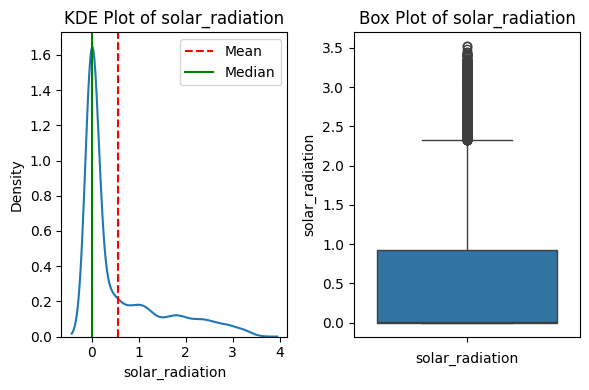

In [ ]:
plot_kde_boxplot(df, 'solar_radiation')

In [ ]:
outliers = detect_outliers_iqr(df['solar_radiation'])
print("Outliers:", outliers)


Outliers: 1741    2.35
1885    2.46
1886    2.39
1982    2.49
2054    2.36
        ... 
7741    2.43
7764    2.37
7765    2.45
7788    2.33
7789    2.40
Name: solar_radiation, Length: 641, dtype: float64




*   Solar Radiation column is positively skewed.
*   The outlier values starting from 2.35.


**Rainfall**

In [ ]:
df['rainfall'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: rainfall, Length: 61, dtype: int64

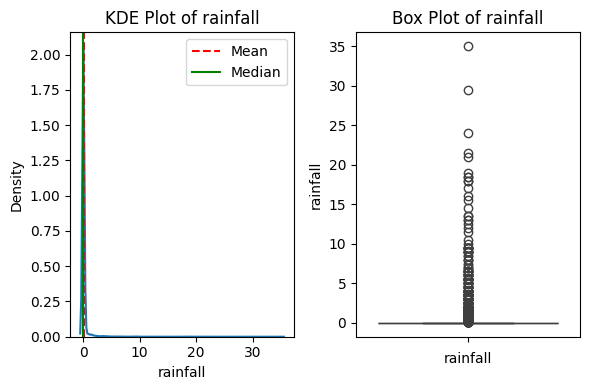

In [ ]:
plot_kde_boxplot(df, 'rainfall')

In [ ]:
outliers = detect_outliers_iqr(df['rainfall'])
print("Outliers:", outliers)


Outliers: 51      0.5
54      1.0
57      2.5
78      0.1
120     0.1
       ... 
8241    0.5
8520    0.2
8523    1.0
8601    9.1
8604    1.8
Name: rainfall, Length: 528, dtype: float64




*   Rainfall column is positively skewed.
*  The outlier value starts from 0.5.



**Snowfall**

In [ ]:
df['snowfall'].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: snowfall, dtype: int64

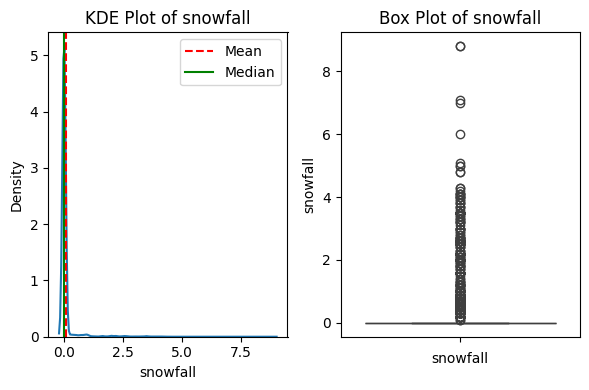

In [ ]:
plot_kde_boxplot(df, 'snowfall')

In [ ]:
outliers = detect_outliers_iqr(df['snowfall'])
print("Outliers:", outliers)


Outliers: 120     0.1
121     0.3
122     0.4
123     0.4
124     0.4
       ... 
8645    0.3
8646    0.3
8647    0.3
8648    0.3
8649    0.2
Name: snowfall, Length: 443, dtype: float64




*   Snowfall column is postively skewed.
*   The outlier value starts from 0.1.



**Distribution of categorical columns**

**Bar plot for 'Seasons'**

In [ ]:
df['seasons'].value_counts()

2    2208
3    2208
1    2184
4    2160
Name: seasons, dtype: int64

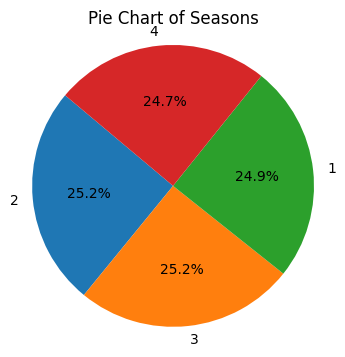

In [ ]:
# Count the occurrences of each season
season_counts = df['seasons'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Seasons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



*   People used bike in season 2 and season 3.




**Bar plot for 'Functioning Day'**

In [ ]:
df['functioning_day'].value_counts()

1    8465
0     295
Name: functioning_day, dtype: int64

<ipython-input-18-b37f6b1196ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='functioning_day', palette='viridis')


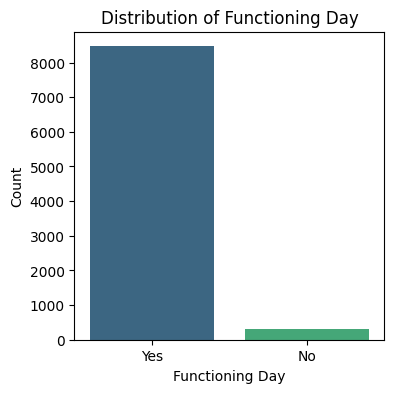

In [ ]:
# Plot bar plot for 'Functioning Day'
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='functioning_day', palette='viridis')
plt.title('Distribution of Functioning Day')
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.show()



*   More bike were rented on functioning day(8465).







**Bar plot for 'Holiday'**

In [ ]:
df['holiday'].value_counts()

1    8328
0     432
Name: holiday, dtype: int64

<ipython-input-20-c44c0504fa69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='holiday', palette='viridis')


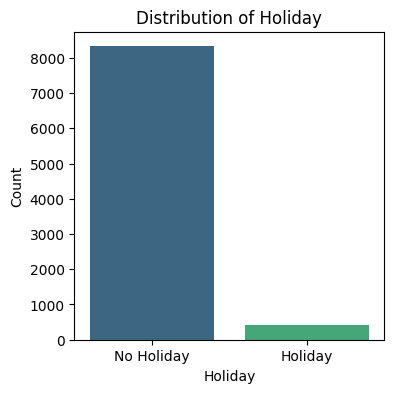

In [ ]:
# Plot bar plot for 'Holiday'
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='holiday', palette='viridis')
plt.title('Distribution of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()



*   More bike were rented on day when there was no holiday(8328).



**Bar plot of newly created column**

In [ ]:
df['weekday_weekend'].value_counts()

0    6216
1    2544
Name: weekday_weekend, dtype: int64

In [ ]:
df['month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [ ]:
df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

<ipython-input-22-5784e26df0ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


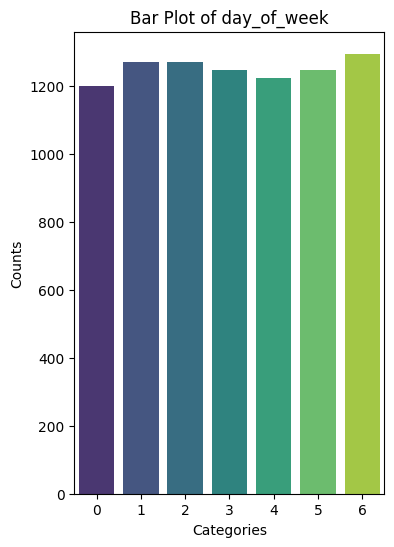

<ipython-input-22-5784e26df0ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


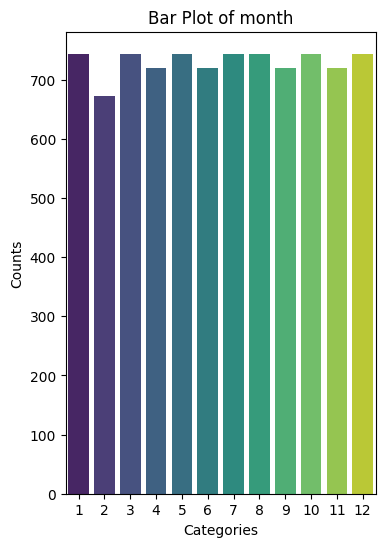

<ipython-input-22-5784e26df0ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


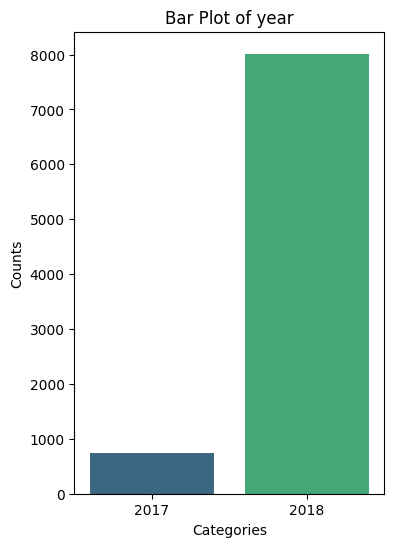

<ipython-input-22-5784e26df0ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


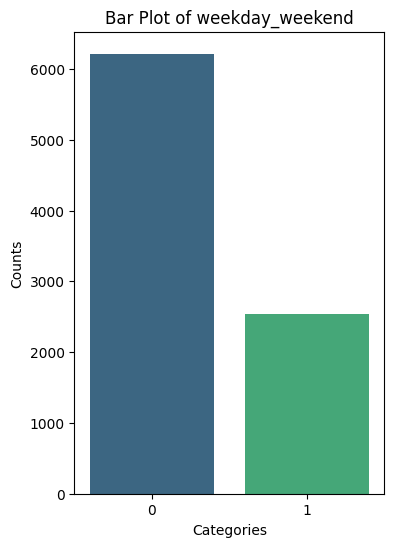

In [ ]:
# List of new categorical columns
new_categorical_columns = ['day_of_week', 'month', 'year', 'weekday_weekend']

# Plotting bar plots for each new categorical column
for col in new_categorical_columns:
    # Count the occurrences of each category
    category_counts = df[col].value_counts()

    # Create a bar plot
    plt.figure(figsize=(4, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.show()

**Bivariate Analysis**

**Plotting regplots for each numerical column**

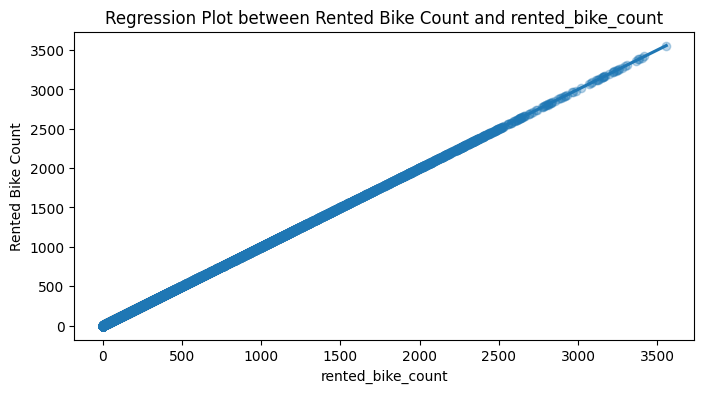

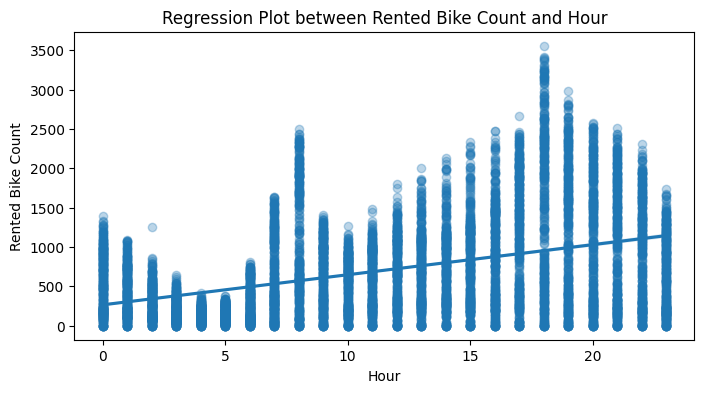

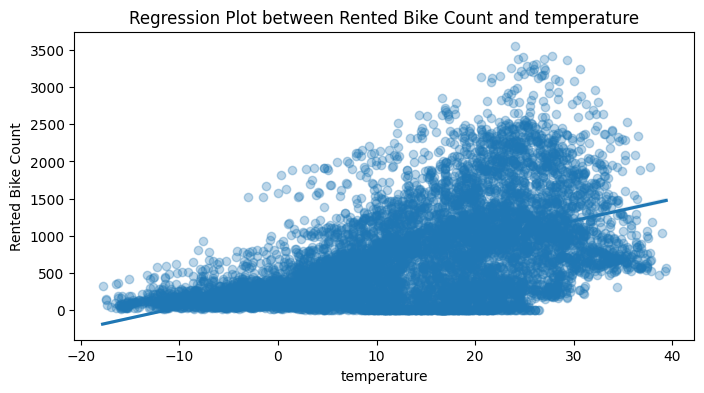

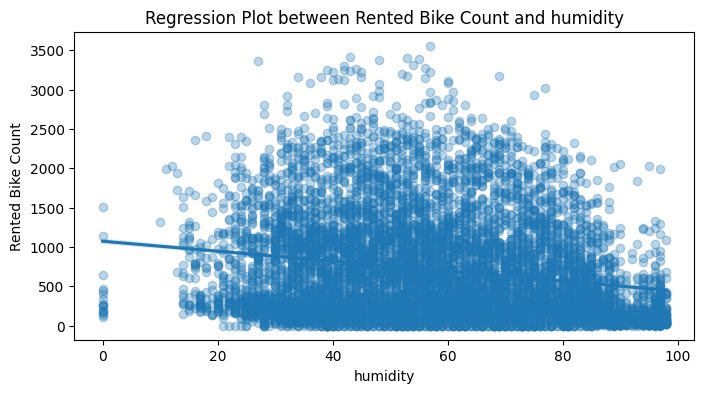

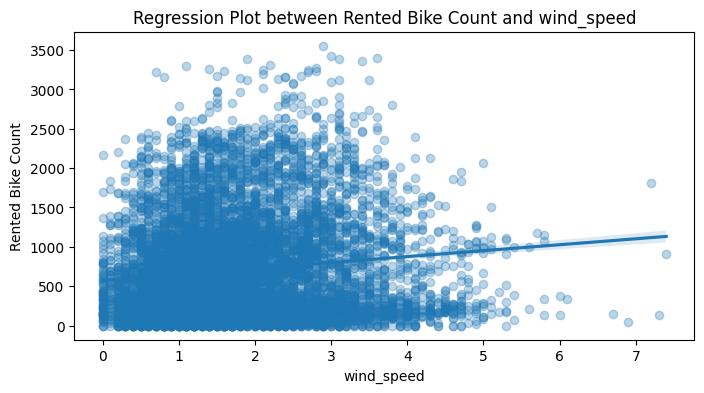

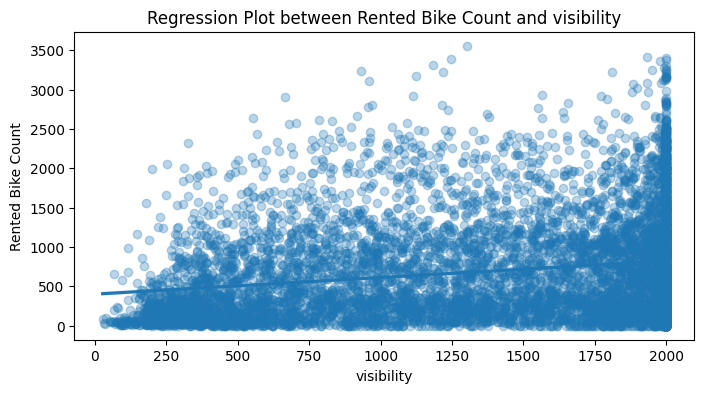

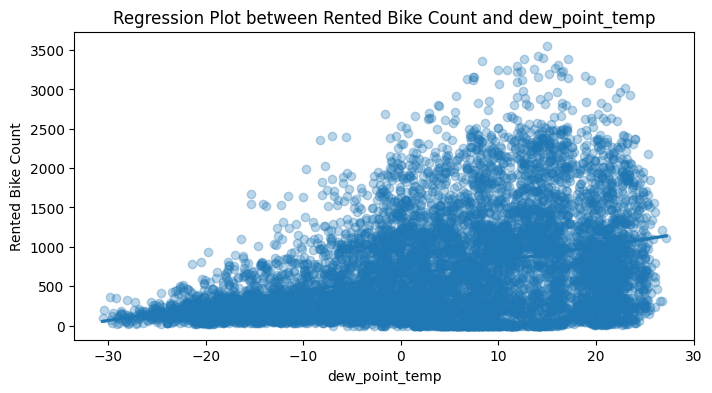

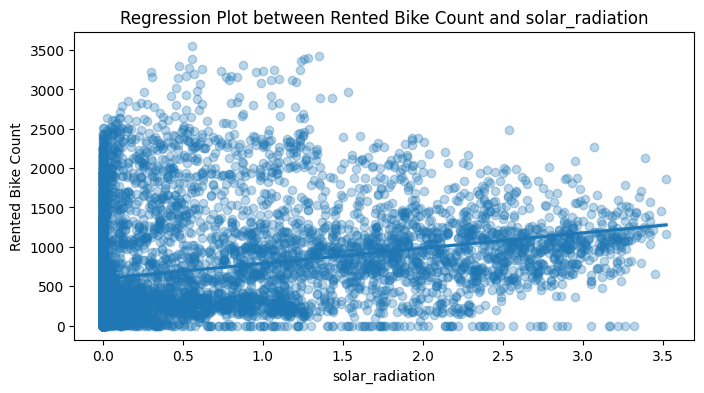

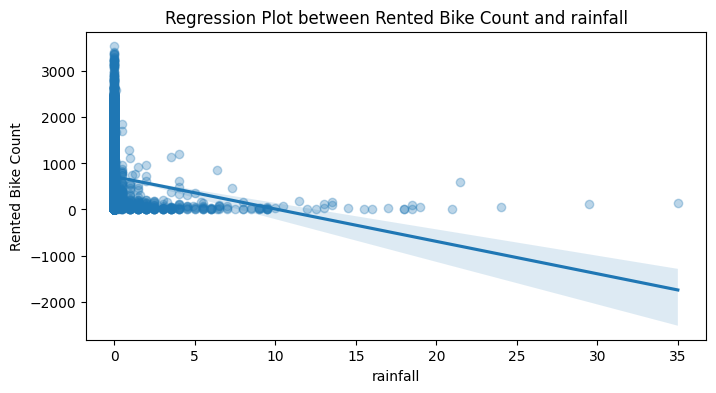

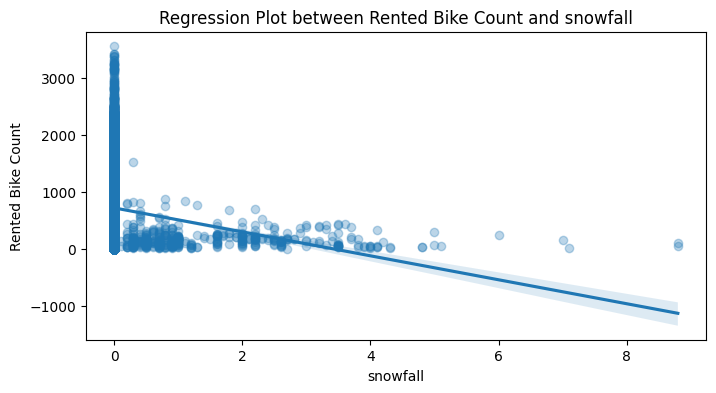

In [ ]:
# Plotting regplots for each numerical column
for col in num_cols:
    if col != 'Rented Bike Count':  # Exclude Rented Bike Count itself
        plt.figure(figsize=(8, 4))
        sns.regplot(x=col, y='rented_bike_count', data=df, scatter_kws={'alpha':0.3})
        plt.title(f'Regression Plot between Rented Bike Count and {col}')
        plt.xlabel(col)
        plt.ylabel('Rented Bike Count')
        plt.show()




*  Rented bike count and hour has positive relation.

*   Rented bike count and temperature has positive relation.

*   Rented bike count and visibility has positive relation.

*   Rented bike count and humidity has negative relation.

*   Rented bike count and dew point temp has positive relation.

*   Rented bike count and solar radiation has positive relation.

*   Rented bike count and rainfall has negative relation.

*   Rented bike count and snowfall has negative relation.





**Plotting bar plots for the relationship between each categorical column and 'Rented Bike Count'**

In [ ]:
# Selecting categorical columns
categ_cols = df.select_dtypes(include=['object', 'category']).columns


<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


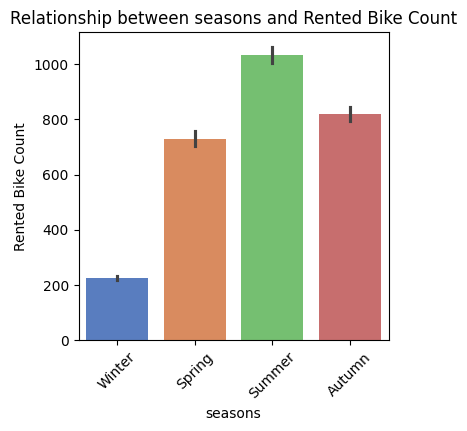

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


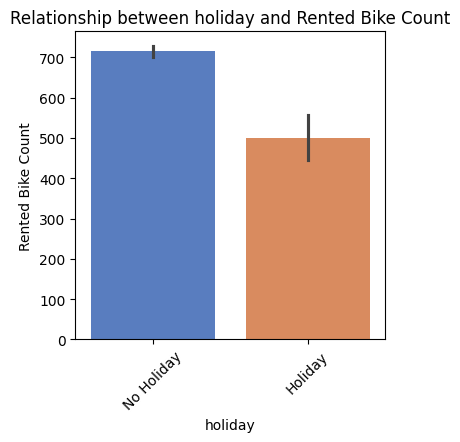

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


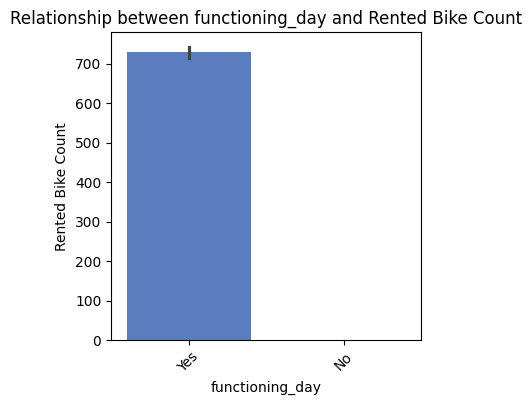

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


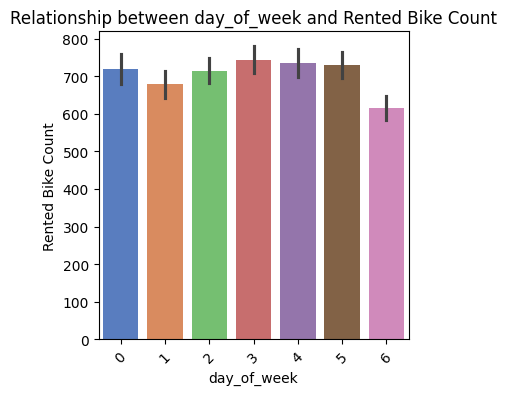

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


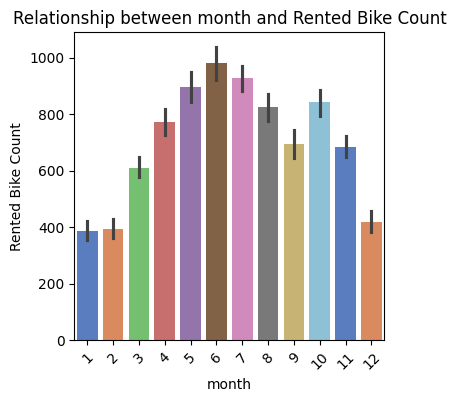

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


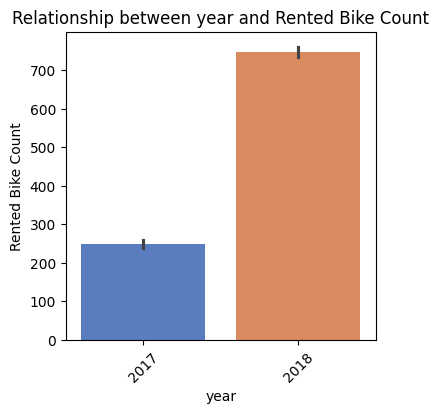

<ipython-input-30-1b9b1e91e819>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')


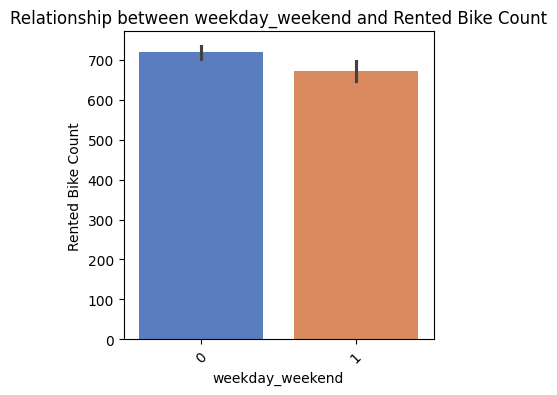

In [ ]:
# Plotting bar plots for the relationship between each categorical column and 'Rented Bike Count'
for col in categ_cols:
    plt.figure(figsize=(4, 4))
    sns.barplot(x=col, y='rented_bike_count', data=df, palette='muted')
    plt.title(f'Relationship between {col} and Rented Bike Count')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
    plt.show()



*   Most bikes were rented in summer season.
*   More bikes were rented when there was no holiday.

*   More bikes were rented on functioning day.

*   More bikes were rented on 3rd ,4th and 5th day of the week.

*   More bikes were rented on weekday.

*   More bikes were rented on year 2018.

*   Most bikes were rented in 6th and 7th month and least bikes were rented in 1st and 2nd month respectively.















**Relationship between the 'Rented Bike Count' and the 'Rainfall' and 'Functioning day' as a categorical variable**

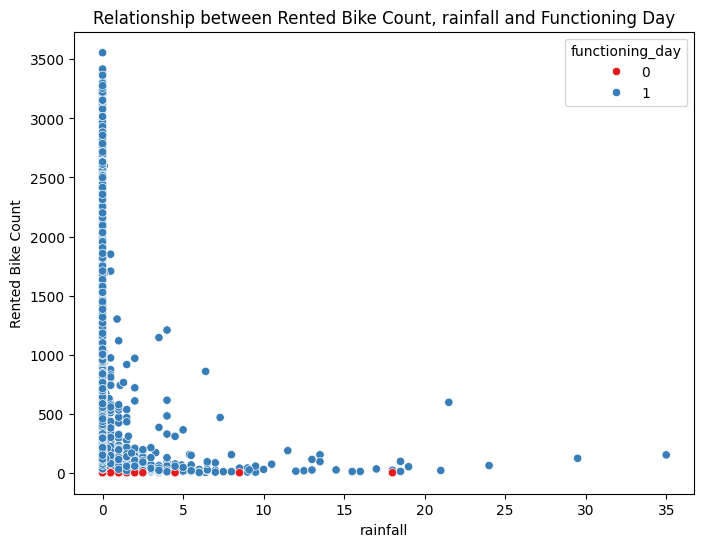

In [ ]:
# Scatter plot for visualising relationship between the 'Rented Bike Count' and the 'Functioning Day' and 'Rainfall' as a categorical variable
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rainfall', y='rented_bike_count', hue='functioning_day', palette='Set1')
plt.title('Relationship between Rented Bike Count, rainfall and Functioning Day')
plt.xlabel('rainfall')
plt.ylabel('Rented Bike Count')
plt.show()



*   More bike were rented on functioning day when rainfall is 0mm to 5mm.




**Multivariate Analysis**

**Relationship between the 'Rented Bike Count', 'Functioning Day' and 'Visibility'**

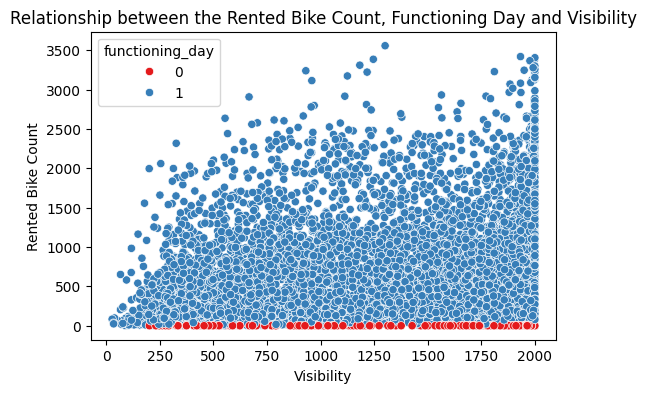

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='visibility', y='rented_bike_count', hue='functioning_day', palette='Set1')
plt.title('Relationship between the Rented Bike Count, Functioning Day and Visibility')
plt.xlabel('Visibility')
plt.ylabel('Rented Bike Count')
plt.show()

**Relationship between the 'Rented Bike Count', 'Functioning Day' and 'temperature'**

---



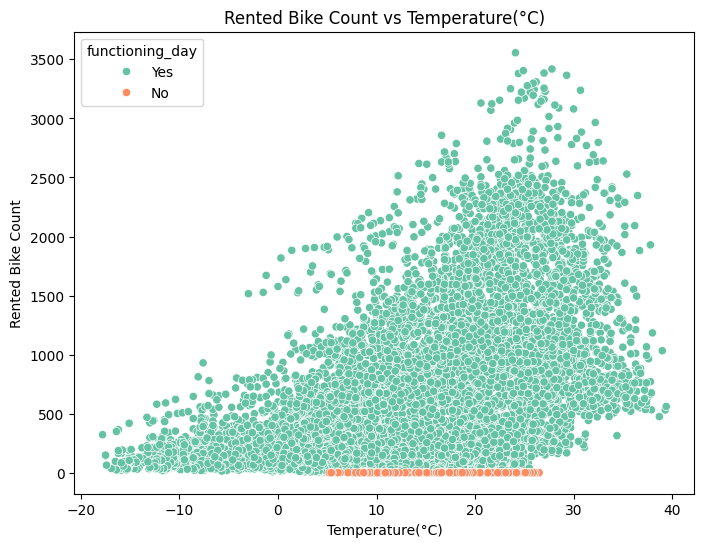

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='temperature', y='rented_bike_count', hue='functioning_day', palette='Set2')
plt.title('Rented Bike Count vs Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()



*   More bike were rented on functioning day 10°C and 30°C.







**Relationship between seasons,rented bike count and functioning day**

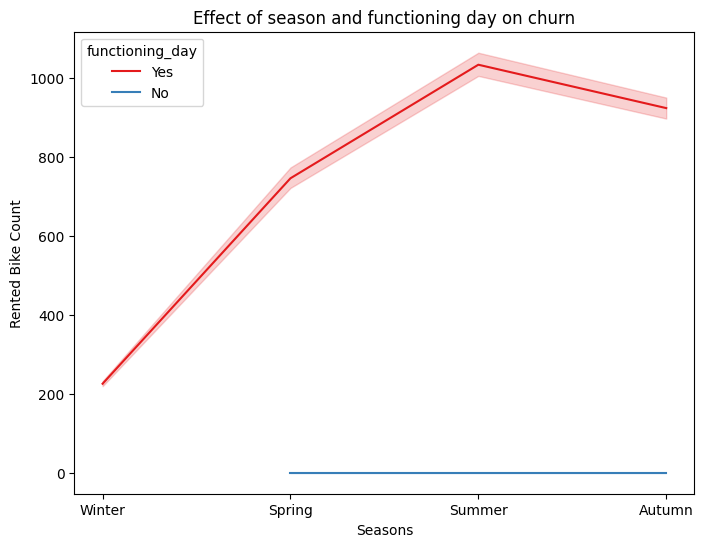

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='seasons', y='rented_bike_count', hue='functioning_day', palette='Set1')
plt.title('Relationship between seasons,rented bike count and functioning day')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

**Relationship between seasons,rented bike count and holiday**

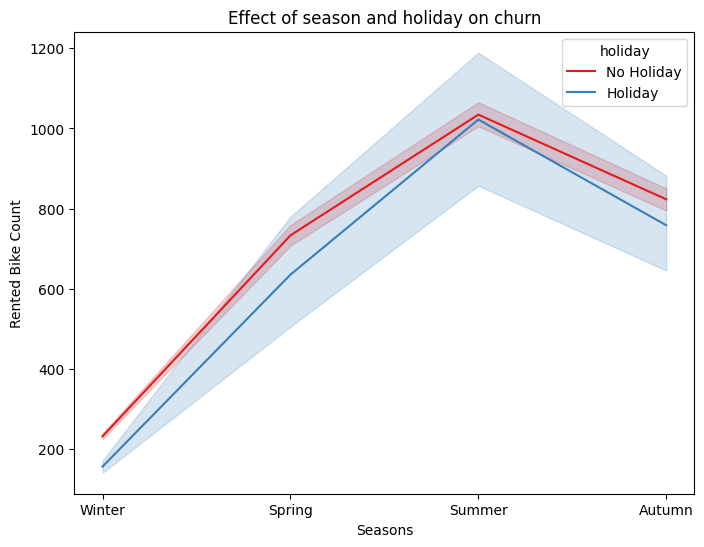

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='seasons', y='rented_bike_count', hue='holiday', palette='Set1')
plt.title('Relationship between seasons,rented bike count and holiday')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

**Relationship between hour,rented bike count and seasons**

<ipython-input-38-c153703d9c75>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='rented_bike_count', hue='seasons', data=df, palette='muted', ci=None)


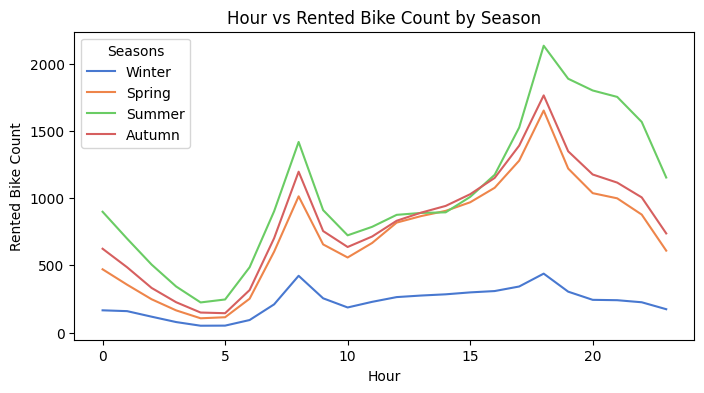

In [ ]:
# Plotting line plot for Hour vs Rented Bike Count with hue as Season
plt.figure(figsize=(8, 4))
sns.lineplot(x='Hour', y='rented_bike_count', hue='seasons', data=df, palette='muted', ci=None)
plt.title('Hour vs Rented Bike Count by Season')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend(title='Seasons')
plt.show()

**Relationship between hour,rented bike count and holiday**

<ipython-input-39-2d0d498ba7aa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='rented_bike_count', hue='holiday', data=df, palette='muted', ci=None)


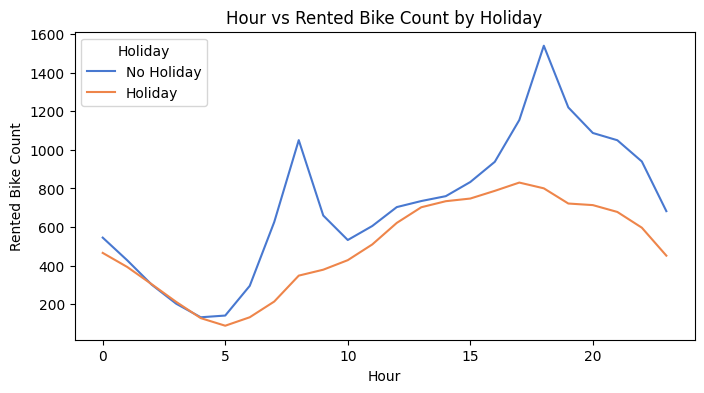

In [ ]:
# Plotting line plot for Hour vs Rented Bike Count with hue as Holiday
plt.figure(figsize=(8, 4))
sns.lineplot(x='Hour', y='rented_bike_count', hue='holiday', data=df, palette='muted', ci=None)
plt.title('Hour vs Rented Bike Count by Holiday')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend(title='Holiday')
plt.show()

**Hour vs Rented Bike Count by Functioning Day**

<ipython-input-41-035ae1c7e097>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='rented_bike_count', hue='functioning_day', data=df, palette='muted', ci=None)


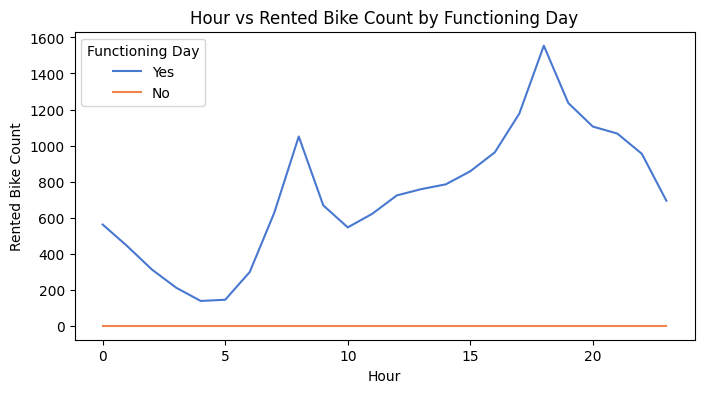

In [ ]:
# Plotting line plot for Hour vs Rented Bike Count with hue as Functioning Day
plt.figure(figsize=(8, 4))
sns.lineplot(x='Hour', y='rented_bike_count', hue='functioning_day', data=df, palette='muted', ci=None)
plt.title('Hour vs Rented Bike Count by Functioning Day')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend(title='Functioning Day')
plt.show()

**Hour vs Rented Bike Count by Weekday_Weekend**

<ipython-input-44-17347732e013>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='rented_bike_count', hue='weekday_weekend', data=df, palette='muted', ci=None)


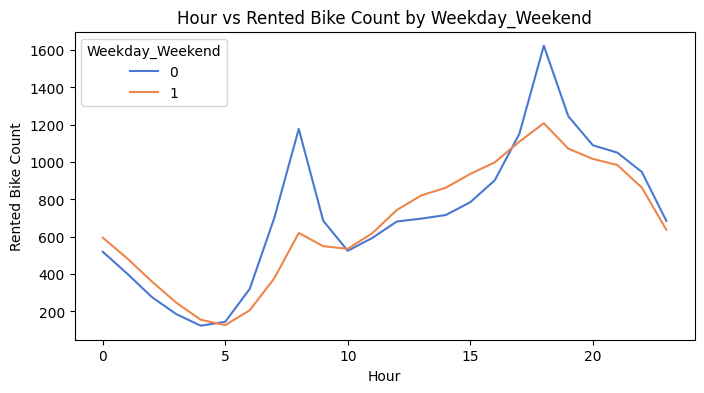

In [ ]:
# Plotting line plot for Hour vs Rented Bike Count with hue as Weekday_Weekend
plt.figure(figsize=(8, 4))
sns.lineplot(x='Hour', y='rented_bike_count', hue='weekday_weekend', data=df, palette='muted', ci=None)
plt.title('Hour vs Rented Bike Count by Weekday_Weekend')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend(title='Weekday_Weekend')
plt.show()

**Pair plot**

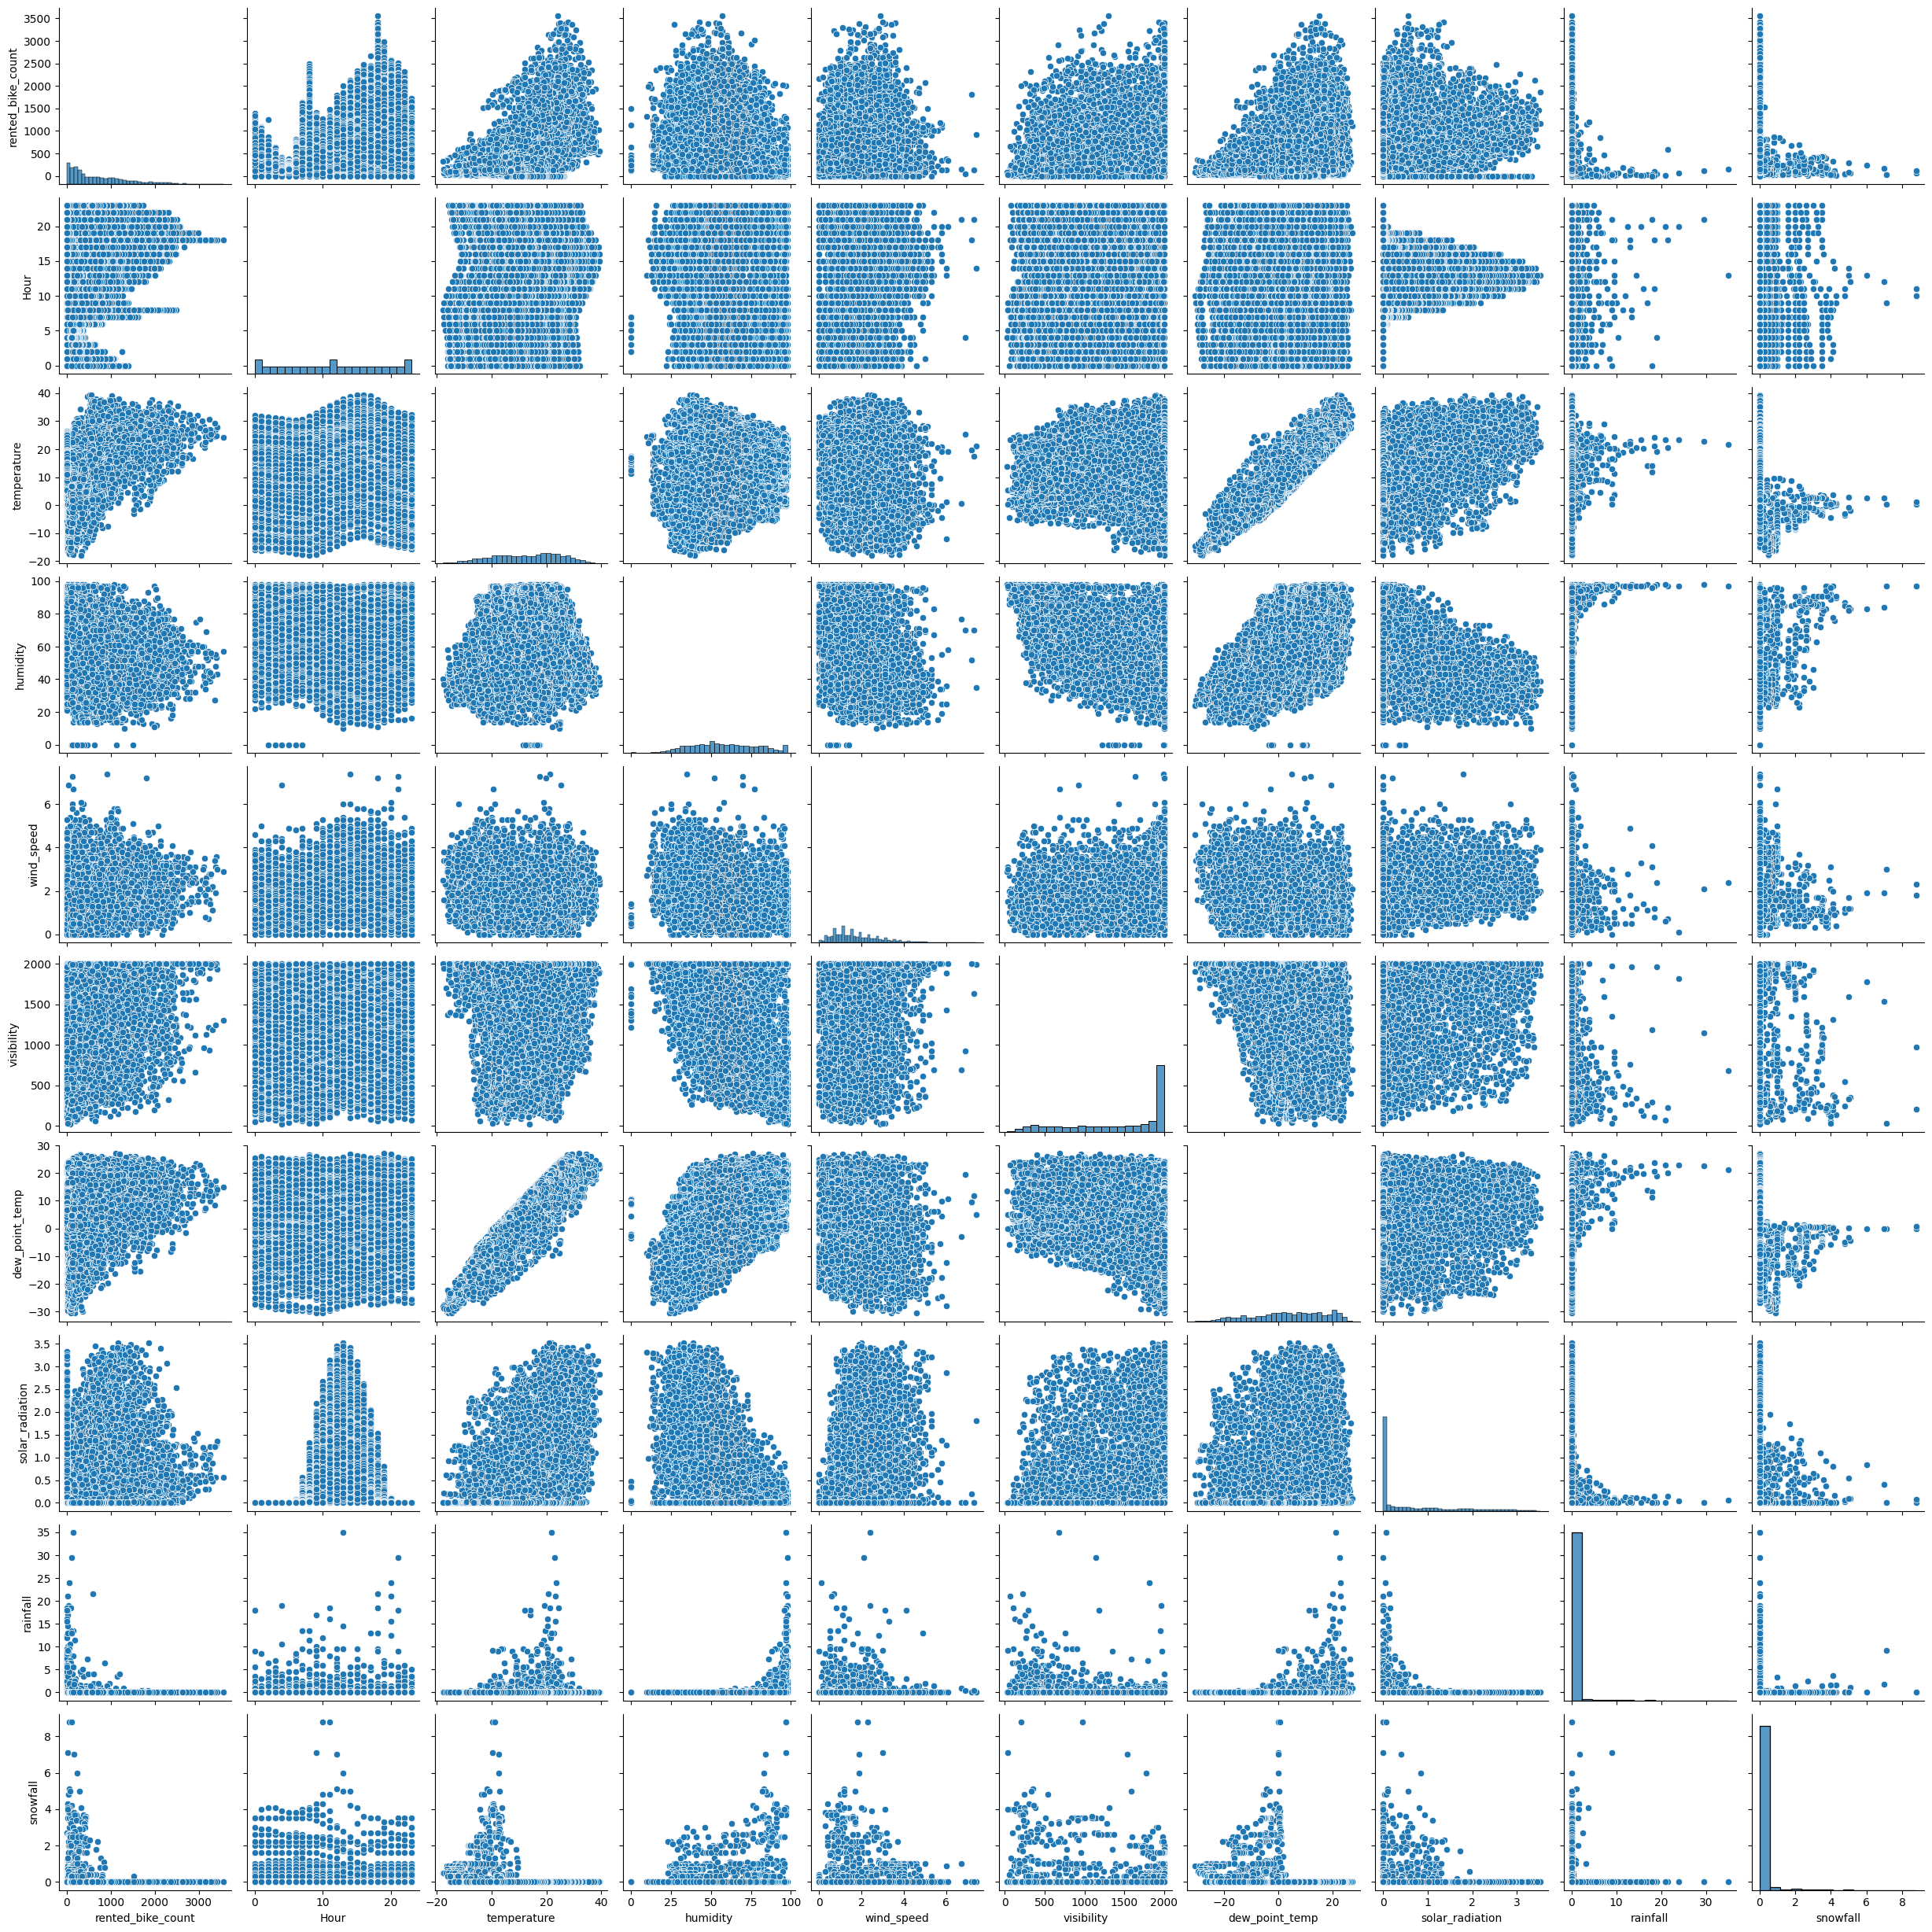

In [ ]:
# Plot pair plot
sns.pairplot(num_cols)
plt.show()

**Pair plot of 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)'**

<Figure size 200x200 with 0 Axes>

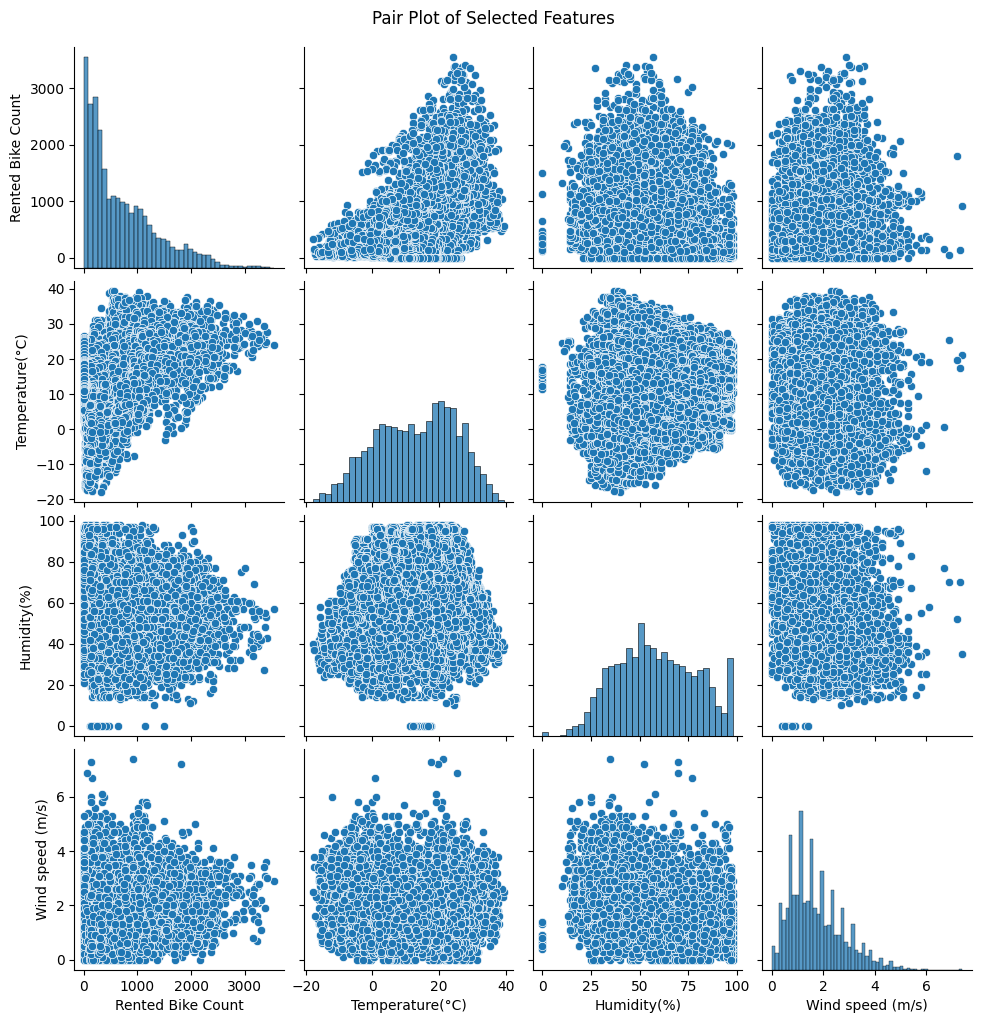

In [ ]:
# Select the features you want to analyze interactions for
selected_features = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']

# Create a pair plot
plt.figure(figsize=(2, 2))
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**Correlation Heatmap**

<ipython-input-47-c775abfe6dc8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


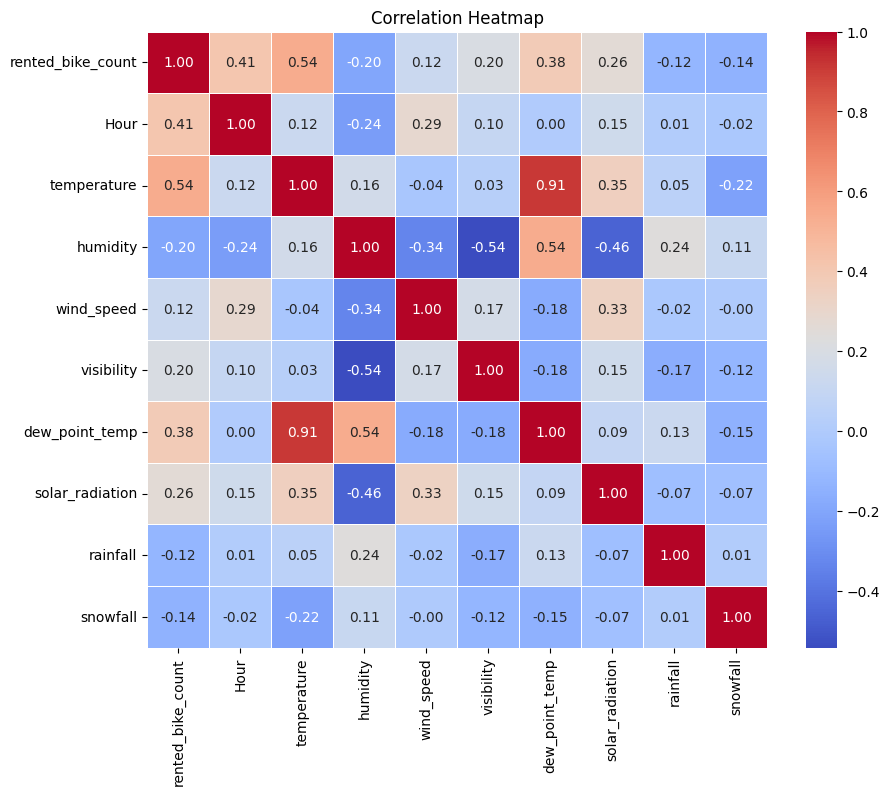

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Drop dew_point_temp and Date column**

In [ ]:
df.drop(columns=['dew_point_temp'], inplace=True)



*   We have dropped dew point temp since it's highly related to temperature column.
*   We have kept temperature column.



In [ ]:
df.drop(columns=['Date'], inplace=True)

**Encoding categorical features**

**Mapping 'Season'**

In [ ]:
seasons_mapping = {'Autumn': 1, 'Spring': 2, 'Summer': 3, 'Winter': 4}
df['seasons'] = df['seasons'].replace(seasons_mapping)

**Mapping 'Holiday'**

In [ ]:
holiday_mapping = {'Holiday': 0, 'No Holiday': 1}
df['holiday'] = df['holiday'].replace(holiday_mapping)

**Mapping 'Functioning Day'**

In [ ]:
functioning_day_mapping = {'No': 0, 'Yes': 1}
df['functioning_day'] = df['functioning_day'].replace(functioning_day_mapping )

In [ ]:
print(df.columns)

Index(['rented_bike_count', 'Hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'day_of_week', 'month', 'year',
       'weekday_weekend'],
      dtype='object')


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Hour', 'weekday_weekend', 'month', 'year'])
print(df_encoded)

      rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      solar_radiation  rainfall  snowfall  seasons  holiday  ...  month_5  \
0                 0.0       0.0   

**Data Transformaion**

In [ ]:
# Original skewness of 'Rented Bike Count'
original_skewness = skew(df['rented_bike_count'])
original_skewness

1.1532306631480034

**Log Transformaion**

In [ ]:
# Log transformation
df['Log rented bike count'] = np.log1p(df['rented_bike_count'])
log_skewness = skew(df['Log rented bike count'])

**Square root Transformaion**

In [ ]:
# Square root transformation
df['Sqrt rented bike count'] = np.sqrt(df['rented_bike_count'])
sqrt_skewness = skew(df['Sqrt rented bike count'])

**Display skewness before and after transformation**

In [ ]:
# Display skewness before and after transformation
print(f"Original skewness: {original_skewness}")
print(f"Skewness after log transformation: {log_skewness}")
print(f"Skewness after square root transformation: {sqrt_skewness}")

Original skewness: 1.1532306631480034
Skewness after log transformation: -1.8318848950732047
Skewness after square root transformation: 0.23732144485836718


**Histograms before and after transformations**

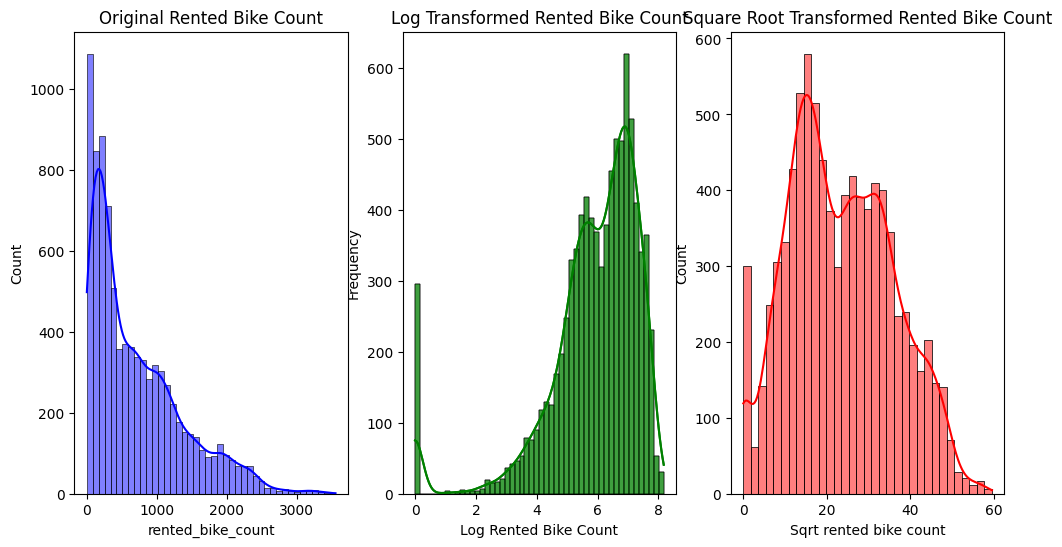

In [ ]:
# Plot histograms before and after transformations
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['rented_bike_count'], kde=True, color='blue', alpha=0.5)
plt.title('Original Rented Bike Count')

# Log transformed distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Log rented bike count'], kde=True, color='green')
plt.title('Log Transformed\nSkewness: {:.2f}'.format(log_skewness))
plt.xlabel('Log Rented Bike Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Log rented bike count'], kde=True, color='green', alpha=0.5)
plt.title('Log Transformed Rented Bike Count')

plt.subplot(1, 3, 3)
sns.histplot(df['Sqrt rented bike count'], kde=True , color='red', alpha=0.5)
plt.title('Square Root Transformed Rented Bike Count')

plt.show()


**Split the data into training and testing sets**

In [ ]:
# Define X and y
X = df.drop(['rented_bike_count'], axis=1)  # Features
y = df['rented_bike_count']  # Target variable

# Add the transformed feature to the feature set
X['Sqrt rented_bike_count'] = np.sqrt(df['rented_bike_count'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7008, 18)
Shape of X_test: (1752, 18)
Shape of y_train: (7008,)
Shape of y_test: (1752,)


**Model impelmentation**

**Model1: Linear Regression**

In [ ]:
# 1. Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 2. Evaluate Linear Regression
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
lr_adj_r2 = 1 - (1 - lr_r2) * ((n - 1) / (n - p - 1))

In [ ]:
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R2):", lr_r2)
print("Adjusted R-squared (Adj R2):", lr_adj_r2)

Linear Regression Metrics:
Mean Squared Error (MSE): 3712.6499485759387
Mean Absolute Error (MAE): 44.170279079778936
R-squared (R2): 0.9910892032315098
Adjusted R-squared (Adj R2): 0.9909966502356455


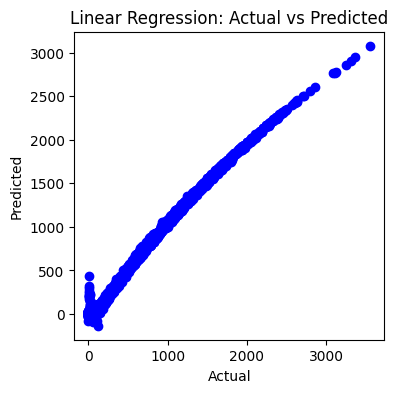

In [ ]:
# 3. Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(4, 4))
plt.scatter(y_test, lr_predictions, color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

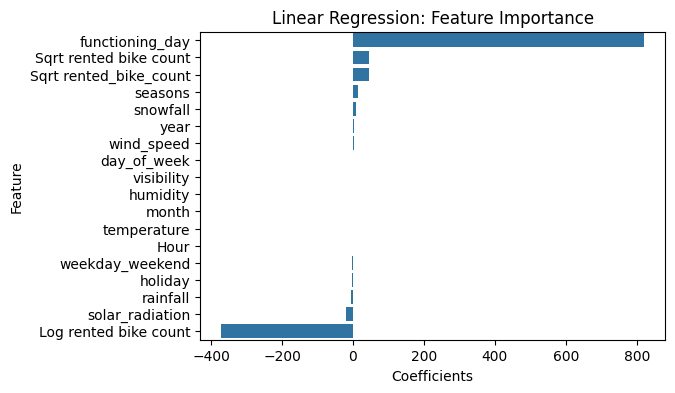

In [ ]:
# 4. Plot feature importance for Linear Regression (coefficients)
plt.figure(figsize=(6, 4))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficients': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficients', ascending=False)
sns.barplot(x='Coefficients', y='Feature', data=coefficients)
plt.title('Linear Regression: Feature Importance')
plt.xlabel('Coefficients')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Display feature importance scores in tabular form
print("\nLinear Regression: Feature Importance Scores")
print(coefficients)


Linear Regression: Feature Importance Scores
                   Feature  Coefficients
10         functioning_day    820.495054
16  Sqrt rented_bike_count     44.246348
18  Sqrt rented bike count     44.246348
8                  seasons     13.641281
7                 snowfall      8.499847
13                    year      3.837050
3               wind_speed      3.232293
11             day_of_week      0.163865
4               visibility      0.005050
2                 humidity     -0.155106
12                   month     -0.296831
1              temperature     -0.893371
0                     Hour     -0.900120
14         weekday_weekend     -1.876770
9                  holiday     -1.992263
6                 rainfall     -5.528224
5          solar_radiation    -20.646498
15   Log rented_bike_count   -185.673254
17   Log rented bike count   -185.673254


**Model2: Decision Tree**

In [ ]:
# 1. Implement Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# 2. Evaluate Decision Tree
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
dt_adj_r2 = 1 - (1 - dt_r2) * ((n - 1) / (n - p - 1))

In [ ]:
print("Decision Tree Metrics:")
print("Mean Squared Error (MSE):", dt_mse)
print("Mean Absolute Error (MAE):", dt_mae)
print("R-squared (R2):", dt_r2)
print("Adjusted R-squared (Adj R2):", dt_adj_r2)

Decision Tree Metrics:
Mean Squared Error (MSE): 19.560502283105023
Mean Absolute Error (MAE): 0.4577625570776256
R-squared (R2): 0.9999530524927077
Adjusted R-squared (Adj R2): 0.999952564867127


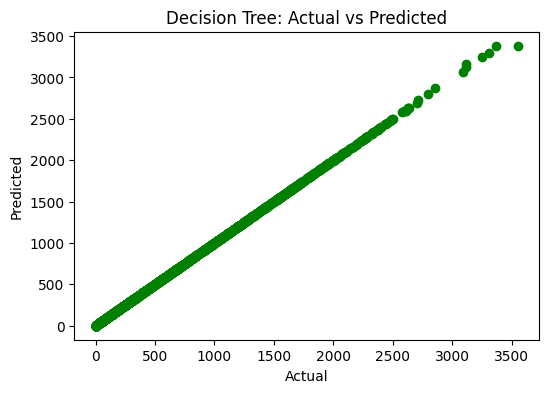

In [ ]:
# 3. Plot actual vs predicted values for Decision Tree
plt.figure(figsize=(6, 4))
plt.scatter(y_test, dt_predictions, color='green')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Model3: Random Forest Regressor**

In [ ]:
# 1. Implement Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 2. Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
rf_adj_r2 = 1 - (1 - rf_r2) * ((n - 1) / (n - p - 1))

In [ ]:
print("Random Forest Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("Adjusted R-squared (Adj R2):", rf_adj_r2)

Random Forest Metrics:
Mean Squared Error (MSE): 19.12813293378992
Mean Absolute Error (MAE): 0.34356735159816987
R-squared (R2): 0.9999540902300258
Adjusted R-squared (Adj R2): 0.9999536133830209


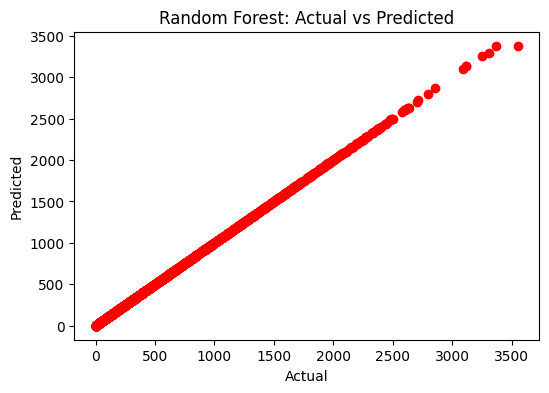

In [ ]:
# 3. Plot actual vs predicted values for Random Forest
plt.figure(figsize=(6, 4))
plt.scatter(y_test, rf_predictions, color='red')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Model4: Gradient Boosting**

In [ ]:
# 1. Implement Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# 2. Evaluate Gradient Boosting
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
gb_adj_r2 = 1 - (1 - gb_r2) * ((n - 1) / (n - p - 1))

In [ ]:
print("Gradient Boosting Metrics:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)
print("Adjusted R-squared (Adj R2):", gb_adj_r2)

Gradient Boosting Metrics:
Mean Squared Error (MSE): 39.026890085746345
Mean Absolute Error (MAE): 3.6902970793185133
R-squared (R2): 0.9999063308712437
Adjusted R-squared (Adj R2): 0.999905357966271


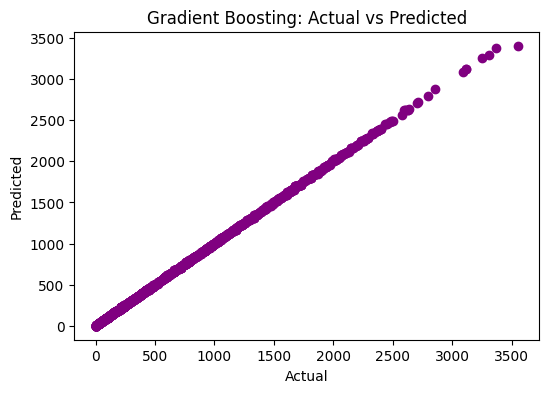

In [ ]:
# 3. Plot actual vs predicted values for Gradient Boosting
plt.figure(figsize=(6, 4))
plt.scatter(y_test, gb_predictions, color='purple')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

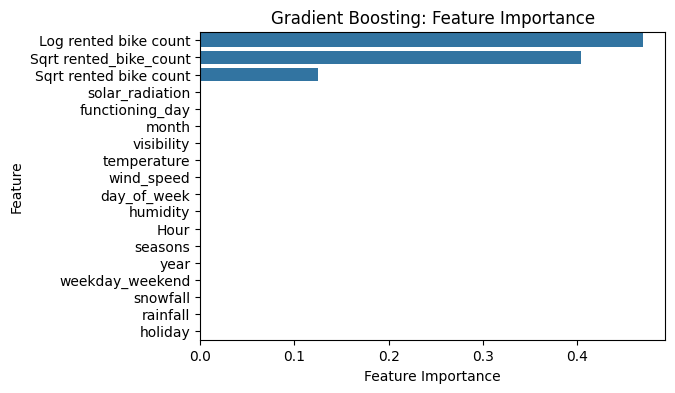

In [ ]:
# 4. Plot feature importance for Gradient Boosting
plt.figure(figsize=(6, 4))
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Gradient Boosting: Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Display feature importance scores in tabular form
print("\nGradient Boosting: Feature Importance Scores")
print(feature_importance)


Gradient Boosting: Feature Importance Scores
Log rented bike count     4.700485e-01
Sqrt rented_bike_count    4.044350e-01
Sqrt rented bike count    1.255154e-01
solar_radiation           2.135698e-07
functioning_day           1.456410e-07
month                     1.371495e-07
visibility                1.120563e-07
temperature               1.106994e-07
wind_speed                1.003113e-07
day_of_week               9.338078e-08
humidity                  6.786072e-08
Hour                      1.465719e-08
seasons                   0.000000e+00
year                      0.000000e+00
weekday_weekend           0.000000e+00
snowfall                  0.000000e+00
rainfall                  0.000000e+00
holiday                   0.000000e+00
dtype: float64


**Model5: XGBoost**

In [ ]:
# 1. Implement XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 2. Evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
xgb_adj_r2 = 1 - (1 - xgb_r2) * ((n - 1) / (n - p - 1))

print("XGBoost Metrics:")
print("Mean Squared Error (MSE):", xgb_mse)
print("Mean Absolute Error (MAE):", xgb_mae)
print("R-squared (R2):", xgb_r2)
print("Adjusted R-squared (Adj R2):", xgb_adj_r2)

XGBoost Metrics:
Mean Squared Error (MSE): 187.73410599188628
Mean Absolute Error (MAE): 4.018002390573397
R-squared (R2): 0.999549416053714
Adjusted R-squared (Adj R2): 0.9995447360127254


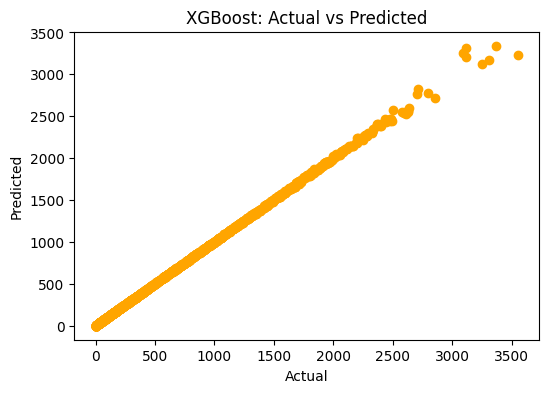

In [ ]:
# 3. Plot actual vs predicted values for XGBoost
plt.figure(figsize=(6, 4))
plt.scatter(y_test, xgb_predictions, color='orange')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Model7: SVM Regressor**

In [ ]:
# 1. Implement SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# 2. Evaluate SVM
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
svm_adj_r2 = 1 - (1 - svm_r2) * ((n - 1) / (n - p - 1))

print("SVM Metrics:")
print("Mean Squared Error (MSE):", svm_mse)
print("Mean Absolute Error (MAE):", svm_mae)
print("R-squared (R2):", svm_r2)
print("Adjusted R-squared (Adj R2):", svm_adj_r2)

SVM Metrics:
Mean Squared Error (MSE): 7079.415196365226
Mean Absolute Error (MAE): 55.07482176738672
R-squared (R2): 0.9830085704474325
Adjusted R-squared (Adj R2): 0.982832087047579


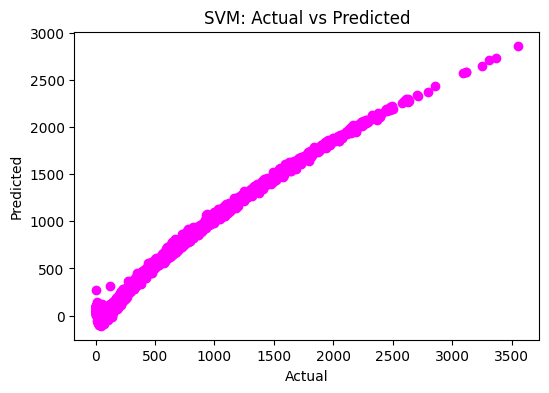

In [ ]:
# 3. Plot actual vs predicted values for SVM
plt.figure(figsize=(6, 4))
plt.scatter(y_test, svm_predictions, color='magenta')
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Model8: KNN Regressor**

In [ ]:
# 1. Implement KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# 2. Evaluate KNN
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
knn_adj_r2 = 1 - (1 - knn_r2) * ((n - 1) / (n - p - 1))

print("KNN Metrics:")
print("Mean Squared Error (MSE):", knn_mse)
print("Mean Absolute Error (MAE):", knn_mae)
print("R-squared (R2):", knn_r2)
print("Adjusted R-squared (Adj R2):", knn_adj_r2)

KNN Metrics:
Mean Squared Error (MSE): 21007.590547945205
Mean Absolute Error (MAE): 88.43904109589042
R-squared (R2): 0.9495793105837524
Adjusted R-squared (Adj R2): 0.9490556104051647


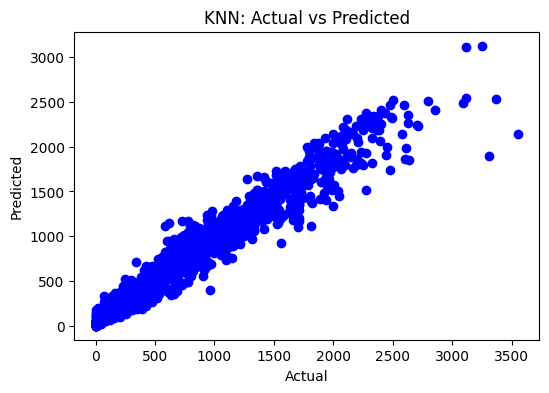

In [ ]:
# 3. Plot actual vs predicted values for KNN
plt.figure(figsize=(6, 4))
plt.scatter(y_test, knn_predictions, color='blue')
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Model9: ElasticNet regression**

In [ ]:
# 1. Implement ElasticNet regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.281e+07, tolerance: 2.914e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [ ]:
# 2. Evaluate ElasticNet regression
elasticnet_predictions = elasticnet_model.predict(X_test)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
elasticnet_mae = mean_absolute_error(y_test, elasticnet_predictions)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)

In [ ]:
# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
elasticnet_adj_r2 = 1 - (1 - elasticnet_r2) * ((n - 1) / (n - p - 1))

print("ElasticNet Metrics:")
print("Mean Squared Error (MSE):", elasticnet_mse)
print("Mean Absolute Error (MAE):", elasticnet_mae)
print("R-squared (R2):", elasticnet_r2)
print("Adjusted R-squared (Adj R2):", elasticnet_adj_r2)

ElasticNet Metrics:
Mean Squared Error (MSE): 7388.100888443955
Mean Absolute Error (MAE): 65.39065348981127
R-squared (R2): 0.9822676884613704
Adjusted R-squared (Adj R2): 0.9820835098071895


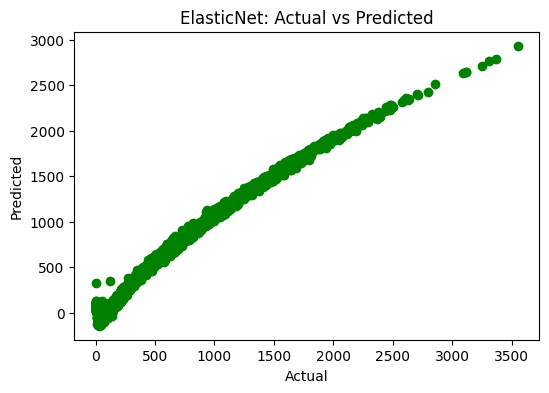

In [ ]:
# 3. Plot actual vs predicted values for ElasticNet regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, elasticnet_predictions, color='green')
plt.title('ElasticNet: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Plot of R-squared Score of Different Models**

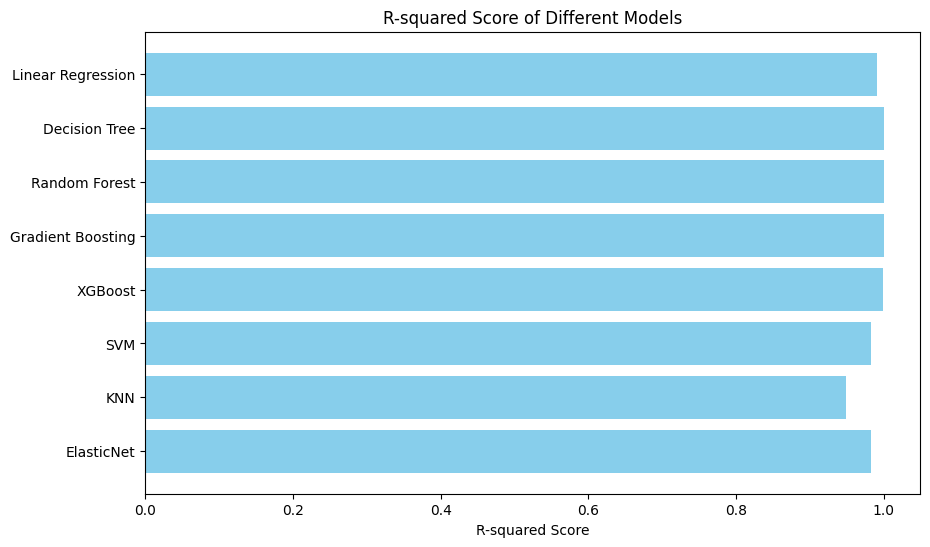

In [ ]:
# Model names and their corresponding R-squared scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'KNN', 'ElasticNet']
r2_scores = [lr_r2, dt_r2, rf_r2, gb_r2, xgb_r2, svm_r2, knn_r2, elasticnet_r2]

# Bar plot for R-squared scores
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R-squared Score')
plt.title('R-squared Score of Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()


**Model Report**

In [ ]:
# Define model names and their corresponding metrics
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'KNN', 'ElasticNet']
mse_scores = [lr_mse, dt_mse, rf_mse, gb_mse, xgb_mse, svm_mse, knn_mse, elasticnet_mse]
mae_scores = [lr_mae, dt_mae, rf_mae, gb_mae, xgb_mae, svm_mae, knn_mae, elasticnet_mae]
r2_scores = [lr_r2, dt_r2, rf_r2, gb_r2, xgb_r2, svm_r2, knn_r2, elasticnet_r2]
adj_r2_scores = [lr_adj_r2, dt_adj_r2, rf_adj_r2, gb_adj_r2, xgb_adj_r2, svm_adj_r2, knn_adj_r2, elasticnet_adj_r2]

# Create a DataFrame
model_performance = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores,
    'Adjusted R-squared': adj_r2_scores
})



In [ ]:
# Display the DataFrame
print(model_performance)


               Model           MSE        MAE  R-squared  Adjusted R-squared
0  Linear Regression   3712.649949  44.170279   0.991089            0.990997
1      Decision Tree     19.560502   0.457763   0.999953            0.999953
2      Random Forest     19.128133   0.343567   0.999954            0.999954
3  Gradient Boosting     39.026890   3.690297   0.999906            0.999905
4            XGBoost    187.734106   4.018002   0.999549            0.999545
5                SVM   7079.415196  55.074822   0.983009            0.982832
6                KNN  21007.590548  88.439041   0.949579            0.949056
7         ElasticNet   7388.100888  65.390653   0.982268            0.982084


**Hyperparameter tuning**

**Decision tree**

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train the model
dt_model_tuned = DecisionTreeRegressor(random_state=42, **best_params)
dt_model_tuned.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=42)

In [ ]:
# Evaluate the tuned model
dt_predictions_tuned = dt_model_tuned.predict(X_test)
dt_mse_tuned = mean_squared_error(y_test, dt_predictions_tuned)
dt_mae_tuned = mean_absolute_error(y_test, dt_predictions_tuned)
dt_r2_tuned = r2_score(y_test, dt_predictions_tuned)
n = len(X_test)
p = X_test.shape[1]
dt_adj_r2_tuned = 1 - (1 - dt_r2_tuned) * ((n - 1) / (n - p - 1))

# Print metrics of the tuned model
print("Tuned Decision Tree Metrics:")
print("Mean Squared Error (MSE):", dt_mse_tuned)
print("Mean Absolute Error (MAE):", dt_mae_tuned)
print("R-squared (R2):", dt_r2_tuned)
print("Adjusted R-squared (Adj R2):", dt_adj_r2_tuned)


Tuned Decision Tree Metrics:
Mean Squared Error (MSE): 17.994018662667226
Mean Absolute Error (MAE): 0.8381987630063852
R-squared (R2): 0.9999568122377352
Adjusted R-squared (Adj R2): 0.9999563636631704


**KNN Regressor**

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train the model
knn_model_tuned = KNeighborsRegressor(**best_params)
knn_model_tuned.fit(X_train, y_train)




KNeighborsRegressor(p=1, weights='distance')

In [ ]:
# Evaluate the tuned model
knn_predictions_tuned = knn_model_tuned.predict(X_test)
knn_mse_tuned = mean_squared_error(y_test, knn_predictions_tuned)
knn_mae_tuned = mean_absolute_error(y_test, knn_predictions_tuned)
knn_r2_tuned = r2_score(y_test, knn_predictions_tuned)
n = len(X_test)
p = X_test.shape[1]
knn_adj_r2_tuned = 1 - (1 - knn_r2_tuned) * ((n - 1) / (n - p - 1))

# Print metrics of the tuned model
print("Tuned KNN Metrics:")
print("Mean Squared Error (MSE):", knn_mse_tuned)
print("Mean Absolute Error (MAE):", knn_mae_tuned)
print("R-squared (R2):", knn_r2_tuned)
print("Adjusted R-squared (Adj R2):", knn_adj_r2_tuned)

Tuned KNN Metrics:
Mean Squared Error (MSE): 13083.774675596225
Mean Absolute Error (MAE): 66.53511095202312
R-squared (R2): 0.9685974011248554
Adjusted R-squared (Adj R2): 0.9682712344891066


**Conclusion**




*  The dataset contains 8760 records and 14 features.
*   There are 11 numerical featrures and 3 categorical features.

*   There is no missing values in the dataset
*   There is no duplicate values in the dataset

*   Most bikes were rented in summer season.
*   More bikes were rented when there was no holiday.

*   More bikes were rented on functioning day.

*   More bikes were rented on 3rd ,4th and 5th day of the week.

*   More bikes were rented on weekday.

*   More bikes were rented on year 2018.

*   Most bikes were rented in 6th and 7th month and least bikes were rented in 1st and 2nd month respectively.



*   Models implemented are 'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'KNN', 'ElasticNet'.



*   **MSE (Mean Squared Error):** The lower the MSE, the better the model's performance. Models with lower MSE values are preferred.
*   **MAE (Mean Absolute Error):** Similar to MSE, lower MAE values indicate better performance.


*   **R-squared and Adjusted R-squared:** R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Adjusted R-squared takes into account the number of predictors in the model. Higher values of R-squared and Adjusted R-squared indicate better fit.

**Considering these criteria, you can rank the models as follows:**
*   **Best Model:**

Decision Tree: It has the lowest MSE(19.56) and MAE(0.418950) values and the highest R-squared(0.999963) and Adjusted R-squared values(0.999963). This indicates that the Decision Tree model performs the best among the models listed.                  

*   **Worst Model:**

KNN (K-Nearest Neighbors): It has the highest MSE(20973.287557) and MAE(88.343265) values and relatively lower R-squared(0.949662) and Adjusted R-squared values(0.949109) compared to other models. Therefore, the KNN model seems to perform the worst among the models listed.
                 


**After hyperparameter tuning**

*   **Decision tree regressor:**After hyperparameter tuning, the Decision Tree model demonstrated significant improvement. The mean squared error (MSE) reduced from 19.56 to 17.99.Additionally, both R-squared and adjusted R-squared values increased, suggesting that the tuned model better explains the variance in the data.

*  **KNN (K-Nearest Neighbors):**After tuning the KNN model, there was a notable improvement in its performance. The mean squared error (MSE) decreased to 13083.77 and with the R-squared value increasing to 0.9686.